# Tarea 2
## Física Computacional

 # Ejercicio 1
Realice en un notebook en el que se explique y programen los siguientes algoritmos de integración de ecuaciones diferenciales:

(a) Integración con el método de Euler.\

(b) Integración sobre serie de Taylor a $2°$ orden.\

(c) Integración con método de Runge-kutta de $2°$ orden.\

(d) Integración con método de Runge-Kutta de $4°$ orden.\

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $y(t)$

## Método de Euler
Bueno, comenzamos con que tenemos una ecuación de la forma:
$$\begin{array}{ccc}
\frac{dy}{dx} = f(x,y) & \text{con} &  y(x_0) = 0
\end{array}$$
donde vamos a tomar los puntos de la siguiente manera: $x_0, x_1, ..., x_n \in  [x_0, b]$.Entonces $x_i = x_0+ih$ con $i = 0,1,...,n$ donde $h = \frac{b-x_0}{n}$.\
Denotaremos $y_0,y_1,...,y_n$ como $y(x_0),y_(x_1),..., y(x_n)$\
[REDACTED]\
Entonces 
$$
y = y(x_i)+f(x_i,y(x_i))(x-x_i)
$$
Si dejamos a $x = x_i +h$ entonces
$$ 
y_{i+1} =y(x_i)+hf(x_i,y(x_i)) 
$$
Por la condición inicial tenemos que $y(x_0) = y_0$, si $i = 0$ entonces
$$
y_1 = y_0 + hf(x_0,y_0)
$$

Ahora para $i = 1$ entonces:
$$
y_2 = y(x_1)+hf(x_1,y(x_1))
$$
Pero no sabemos quien es $y(x_1)$ entonces $y(x_1)\approx y_1$ entonces

$$
y_2 = y_1+hf(x_1,y_1)
$$

Y eventualmente 
$$
y_n = y_{n-1}+hf(x_i,y_{n-1})
$$


In [35]:
from pylab import*
from math import*

In [36]:
def eulerV10( x0, y, h, x ):
# Bueno, definimos Euler siguiendo el algoritmo
#El paso n = paso n-1 y le sumamos h*f(x0,y_n-1)
    Guanabana = 0 
#Guardamos el valor de y
    while x0 < x:
#Tenemos que hacer un while para que se repita el proceso hasta que x0 = x, el paso h        
        Guanabana = y
        y = y + h * f(x0, y)
#Pues Euler 
        x0 = x0 + h
#Aquí sumamos el paso h
    return y
# Y obtenemos el nuevo valor de y

Esta primera fase del código para Euler, fue pensada en que teniamos una condición inicial, nuestra y inicial, el paso y en que punto se iba a evaluar la ecuación diferencial.\
La siguiente ecuación diferencial es la que voy a usar como prueba, para el caso de primer grado.

$$
\frac{dy}{dx} = x-y^2 \quad \text{con} \quad y(0) = 1 \quad \text{y} \quad x = 0.1
$$

### Euler Single Point

In [37]:
def f( x, y ):
    return (x-y**2)    
x0 = 0
y0 = 1
h = 0.001
x = 0.1 
eulerV10(x0, y0, h, x)

0.9136738702500853

Como podemos ver este método no es muy preciso, a menos que el paso lo hagamos pequeño.

In [38]:
#esta nueva versión acepta un arreglo de valores de x
def eulerV15(f, y0, t):
    y = [y0]
    h = t[1] - t[0]
    for i in range(0, len(t)-1): 
        y0 = y0 + h * f(t[i], y0)
        y.append(y0)
    return array(y)

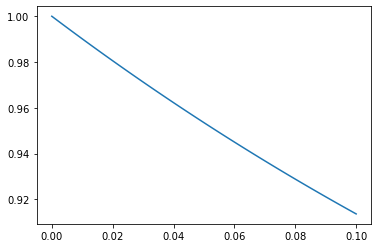

In [39]:
y0 = 1
t = linspace(0, 0.1, 100) 
#Aquí viene incluido, x0, x, y h 
wasa = eulerV15(f, y0, t)
plot(t,wasa)
show()

### Pero , ¿qué pasa si tenemos una ecuación de segundo grado?

In [40]:
def f2(t, x, v):
    return v, exp(-t)*sin(3*t) - 0.5*v - sin(x)

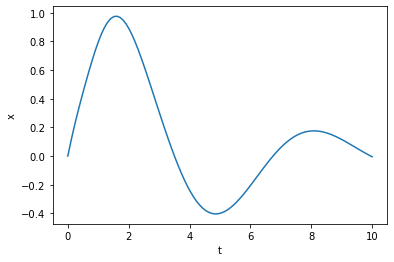

In [41]:
def eulerV20(f, x0, v0, t):
    x = [x0] #lista de valores de x
    h = t[1] - t[0] # paso
    for i in range(0, len(t)-1): 
        x0 = x0 + h * f(t[i-1], x0, v0)[0] # 
        v0 = v0 + h * f(t[i-1], x0, v0)[1]
        x.append(x0)
    return array(x)
x0 = 0 #condicion incial
v0 = 1 #condicion inical 
t = np.linspace(0, 10, 100) # intervalo de tiempo
x = eulerV20(f2, x0, v0, t)  # solucion numerica
plot(t, x)
xlabel('t')
ylabel('x')
show()

## Taylor de segundo orden

Tenemos lo mismo.
$$
\begin{array}{ccc}
\frac{dy}{dx} = f(x,y) & \text{con} & y(x_0)= y_0
\end{array}
$$
Si expandimos y alrededor de $x_0$ entonces
$$
y(x) \approx y(x_0)+\frac{(x-x_0)}{1!}y'(x_0)+\frac{(x-x_0)^2}{2!}y''(x_0)
$$

Tenemos que 
$$
\begin{array}{ccc} \frac{dy}{dx} = f(x,y) & \text{y} & \frac{dy^2}{dx^2} = \frac{df}{dx} = \frac{df}{dy}\cdot \frac{dy}{dx} = f_{y}(x,y)\cdot f(x,y)
\end{array}
$$
i.e
$$
y(x) \approx y(x_0)+\frac{(x-x_0)}{1!}f(x_0,y_0)+\frac{(x-x_0)^2}{2!}f_{y}(x_0,y_0)\cdot f(x_0,y_0)
$$

Recordando a nuestro amigo:
$$
\frac{dy}{dx} = x-y^2 \quad \text{con} \quad y(0) = 1 \quad \text{y} \quad x = 0.1
$$

Para este método, vamos a necesitar la derivada de la función respecto a $y$, entonces tenemos que $f_{y}(x,y) = -2y$ 

In [42]:
#Antes de comenzar a meter valores definamos el algoritmo de Taylor de orden 2
def Taylor2V10(f,fy):
    y = y_0 + f(x_0,y_0)*(x-x_0) + 1/2*fy(x_0,y_0)*f(x_0,y_0)*(x-x_0)**2
    return y
# que como podemos apreciar no necesita de un ciclo, solo es una evaluación y ya.

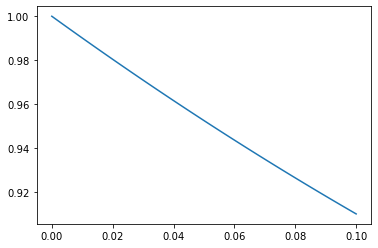

In [43]:
x_0 = 0
y_0 = 1
x = linspace(0,0.1,100)
def fy(f,y):
    return -2*y

x = linspace(0,0.1,100)
WESO = Taylor2V10(f,fy)
plot(x,WESO)
show()

## Taylor de segundo orden para ecuaciones de segundo grado

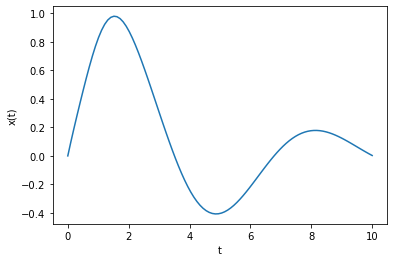

In [44]:
def Taylor2V20(F, Fy, u0, t):
    n = len(u0)
    u = zeros((len(t), n))
    u[0] = u0
    h = t[1] - t[0]
    for i in range(0, len(t) - 1):
        k1 = F(u[i], t[i])
        k2 = dot(Fy(u[i], t[i]), k1)
        u[i+1] = u[i] + h * k1 + 0.5 * h**2 * k2
    return u
def F(u, t):
    x, y = u
    return array([y, exp(-t) * sin(3 * t) - 0.5 * y - sin(x)])
def Fy(u, t):
    x, y = u
    return array([[0, 1], [-cos(x), -0.5]])

u0 = [0, 1]
t = linspace(0, 10, 100)
u = Taylor2V20(F, Fy, u0, t)
plot(t, u[:,0])
xlabel('t')
ylabel('x(t)')
show()

# RUNGE KUTTA 2° ORDEN

Bueno, esos métodos pertenece a la familia de métodos de Runge-Kutta, pero no noes centraremos en eso, solo describiremos brevemente el algoritmo a seguir.
$$
\begin{array}{ccc}
\frac{dy}{dx} = f(x,y) & \text{con} & y(x_0)= y_0
\end{array}
$$

$$ 
y_{i+1} = y_i + \frac{h}{2}(k_1+k_2) \quad \text{con} \quad k_1 = f(x_i,y_i) \quad \text{y} \quad k_2 = f(x_i+h,y_i+hk_1) 
$$
 


### Single point Runge-Kutta 2° orden

In [45]:
def rk2SP(f, y0, x0, x, h):
    n = int((x - x0) / h)
    y = y0
    for i in range(n):
        k1 = h * f(x0, y)
        k2 = h * f(x0 + h, y + k1)
        y += 0.5 * (k1 + k2)
        x0 += h
    return y

In [46]:
def f( x, y ):
    return (x-y**2)    
x0 = 0
y0 = 1
h = 0.001
x = 0.1 
rk2SP(f, y0,x0, x, h)

0.9137943938444608

Vamos a elevar esto a un conjunto de puntos, espero que no sea redundante, pero asi es como lo entiendo.

### Runge-Kutta 2° orden Set of Points  

In [47]:
def rk2SOP(f, y0, x):
    n = len(x)
    y = [y0]
    h = x[1] - x[0]
    for i in range(n-1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h, y[i] + k1)
        y.append(y[i] + 0.5 * (k1 + k2))
    return y

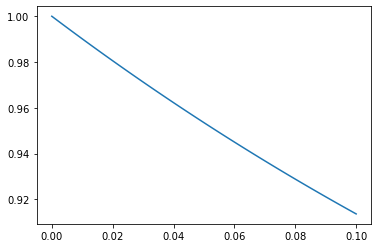

In [48]:
y0 = 1
t = linspace(0, 0.1, 100) 
#Aquí viene incluido, x0, x, y h 
wasa3 = rk2SOP(f, y0, t)
plot(t,wasa)
show()

Y bueno, ahora para una ecuación de segundo grado, tenemos que poder ingresarle un conjunto de condiciones inciales, el conjunto de ecuaciones, que les hemos estado llamando Jacobiano, pero no voy a usar esa notacion, solo queremos algo practico por el momento.

In [49]:
def rk2SODESOP(f, y0, v0, x):
    n = len(x)
    y = [y0]
    v = [v0]
    for i in range(n-1):
        h = x[i+1] - x[i]
        k1_y = h * v[i]
        k1_v = h * f(x[i], y[i], v[i])
        k2_y = h * (v[i] + k1_v)
        k2_v = h * f(x[i] + h, y[i] + k1_y, v[i] + k1_v)
        y.append(y[i] + 0.5 * (k1_y + k2_y))
        v.append(v[i] + 0.5 * (k1_v + k2_v))
    return y

In [50]:
def rk2SYS(f, U0, t):
    n = len(t)
    U = [U0]
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1 = h * f(U[i], t[i])
        k2 = h * f(U[i] + k1, t[i] + h)
        U.append(U[i] + 0.5 * (k1 + k2))
    return np.array(U)




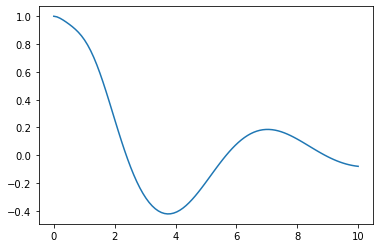

In [51]:
def F(u, t):
    x, y = u
    return np.array([y, np.exp(-t) * np.sin(3 * t) - 0.5 * y - np.sin(x)])

t = np.linspace(0, 10, 100)
U0 = [1, 0]

U = rk2SYS(F, U0, t)

plot(t, U[:,0])
